# TIC-TAC-TOE AND CONNECT FOUR

---



This notebook serves as supporting material for topics covered in **Chapter 5 - Adversarial Search** in the book *Artificial Intelligence: A Modern Approach.* This notebook uses implementations from the [games4e.py](https://github.com/aimacode/aima-python/blob/master/games4e.py) module.

### Note for running this code

The following cell is necessary to allow these examples to execute in Google Colab. We are downloading the AIMA-PYTHON repository into Google Colab to make use of some modified libraries.
<br><br>
**Remember that each time you change or (re/dis)connect your runtime, Google Colab will erase all temporary data.**

In [1]:
# Colab edition by Ghassem Tofighi
# Download and extract all necessary files
!rm -rf /content/*
!wget https://github.com/aimacode/aima-python/archive/master.zip 2>/dev/null
!unzip -q master.zip
!mv aima-python-master/* /content
# Download datasets
!wget https://github.com/aimacode/aima-data/archive/f6cbea61ad0c21c6b7be826d17af5a8d3a7c2c86.zip 2>/dev/null
!unzip -q f6cbea61ad0c21c6b7be826d17af5a8d3a7c2c86.zip
!rm -rf aima-data
!mv aima-data-f6cbea61ad0c21c6b7be826d17af5a8d3a7c2c86 aima-data
# Install additional libraries
!pip install ipythonblocks 2>/dev/null
!pip install qpsolvers 2>/dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 13.6 MB/s eta 0:00:00


In [2]:
# this notebook uses implementations from games4e.py module
from games4e import *
# for checking the source (module) code
from notebook import psource, pseudocode

In this notebook, we study two fun games:

1. **Tic-tac-toe (noughts and crosses)**
2. **Connect Four**

## 1. Game example: Tic-tac-toe (noughts and crosses)

In Tic-tac-toe, two players take turns marking the spaces in a three-by-three grid with X or O. The player who succeeds in placing three of their marks in a horizontal, vertical, or diagonal row is the winner. It is a **solved game**, with a **forced draw** assuming best play from both players.


The game is implemented in the class `TicTacToe` within the `games4e.py` module.

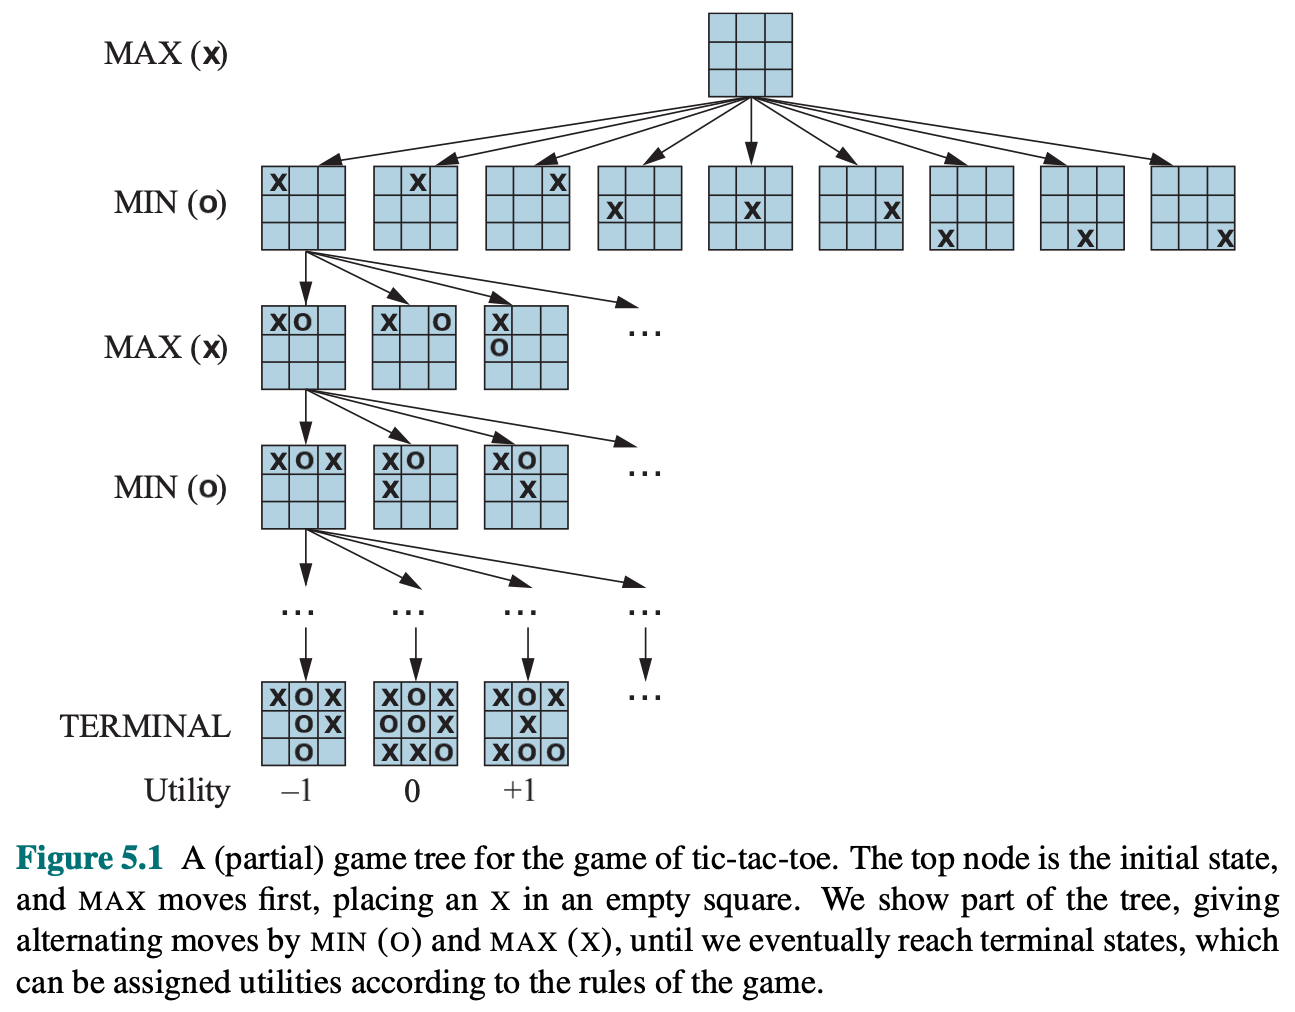

In [ ]:
from IPython.display import Image
Image(filename='/content/AIMA_W04_01.png', width = 500, height = 400)

In [ ]:
# recall the base class Game
# psource(Game)

In [ ]:
# check out the TicTacToe implementation
psource(TicTacToe)

Additional methods in TicTacToe:

* `__init__(self, h=3, v=3, k=3)`:  When you create a class inherited from the `Game` class, you'll have to create an object of this inherited class to initialize the game. This initialization might require some additional information which would be passed to `__init__` as variables. For the case of our `TicTacToe` game, this additional information would be the number of rows `h`, number of columns `v` and how many consecutive X's or O's are needed in a row, column or diagonal for a win `k`. Also, the initial game state has to be defined here.

* `compute_utility(self, board, move, player)`: A method to calculate the utility of TicTacToe game. If 'X' wins with this move, this method returns 1; if 'O' wins return -1; else return 0.

* `k_in_row(self, board, move, player, delta_x_y)`: This method returns `True` if there is a line formed on TicTacToe board with the latest move else `False.`

### 1.1 Game instantiation

First we initialize the game by creating an instance of the subclass `TicTacToe` inherited from the class `Game`:

In [3]:
# instantiate an object to represent the TicTacToe game
ttt = TicTacToe()

We can print a state using the `display()` method:

In [4]:
# checking a particular state of the game
ttt.display(ttt.initial)

. . . 
. . . 
. . . 


That's the initial state of the game: no X's and no O's.

---

### 1.2 `TicTacToe` game state

Now, before we start implementing our `TicTacToe` game, we need to decide how to **represent the game state**. Typically, a game state will give you all the current information about the game at any point in time. When you are given a game state, you should be able to tell whose turn it is next, how the game will look like on a real-life board (if it has one) etc.

A game state need not include the history of the game. If you can play the game further given a game state, you game state representation is acceptable. While we might like to include all kinds of information in our game state, we wouldn't want to put too much information into it. Modifying this game state to generate a new one would be a real pain then.

Now, as for our `TicTacToe` game state, **would storing only the positions of all the X's and O's be sufficient to represent all the game information at that point in time?** Well, **does it tell us whose turn it is next?** Looking at the 'X's and O's on the board and counting them should tell us that. But that would mean extra computing. To avoid this, we will also store whose move it is next in the game state.

Think about what we've done here. *We have reduced extra computation by storing additional information in a game state*. Now, this information might not be absolutely essential to tell us about the state of the game, but it does save us additional computation time. We'll do more of this later on.

To store game states we will use the `GameState` [namedtuple](https://docs.python.org/3.5/library/collections.html#collections.namedtuple). `Gamestate` is defined as follows:

`GameState = namedtuple('GameState', 'to_move, utility, board, moves')`

* `to_move`: A string of a single character, either 'X' or 'O', representing whose turn it is to move next.

* `utility`: It stores the utility of the game state. 1 for win, -1 for loss, 0 otherwise.

* `board`: A dictionary storing all the positions of X's and O's on the board.

* `moves`: A list of all possible legal moves from the current state.

Let us **create a new game state** by ourselves to experiment:

In [5]:
# namedtuple to represent a new game state
# we need to specify the moves, utility, to_move, and the board
my_state = GameState(
    to_move = 'X',
    utility = 0,
    board = {(1,1): 'X', (1,2): 'O', (1,3): 'X',
             (2,1): 'O',             (2,3): 'O',
             (3,1): 'X',
            },
    moves = [(2,2), (3,2), (3,3)]
    )

So, how does this game state look like?

In [6]:
# checking the state
ttt.display(my_state)

X O X 
O . O 
X . . 


### 1.3 Let's play some Tic-Tac-Toe!

We will instantiate a new Tic-Tac-Toe game and play with different players (agents): `random_player`, `alpha_beta_player` and `query_player`.

In [7]:
# new TicTacToe game
ttt2 = TicTacToe()
print(ttt2.initial)

GameState(to_move='X', utility=0, board={}, moves=[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)])


The `random_player` will behave how he is supposed to, i.e. *pseudo-randomly*. Consider the state defined in `my_state` in Sec 4.2.

In [ ]:
random_player(ttt2, my_state)

In [ ]:
random_player(ttt2, my_state)

But the `alpha_beta_player` will always give the **best move**, as expected:

In [ ]:
alpha_beta_player(ttt2, my_state)

Now let's make two players play against each other. We use the `play_game` function for this. The `play_game` function makes players play the match against each other and returns the utility for the first player, of the terminal state reached when the game ends. Hence, for our `TicTacToe` game, if we get the output +1, the first player wins, -1 if the second player wins, and 0 if the match ends in a draw.

In [ ]:
ttt2.play_game(random_player, alpha_beta_player)

The output is (usually) -1, because `random_player` most of the time will **lose** to `alpha_beta_player`. Sometimes, however, `random_player` manages to **draw** with `alpha_beta_player`.

Since an `alpha_beta_player` plays perfectly, a match between two `alpha_beta_players` should always **end in a draw**. Let's see if this happens:

In [ ]:
ttt2.play_game(alpha_beta_player, alpha_beta_player)

In [ ]:
for _ in range(5):
    print(ttt2.play_game(alpha_beta_player, alpha_beta_player))

A `query_player` should **never win (but can draw)** against an `alpha_beta_player`. Let's test that.

In [ ]:
for _ in range(2):
    print(ttt2.play_game(query_player, alpha_beta_player))

Finally, check out the complete map of optimal tic-tac-toe moves!

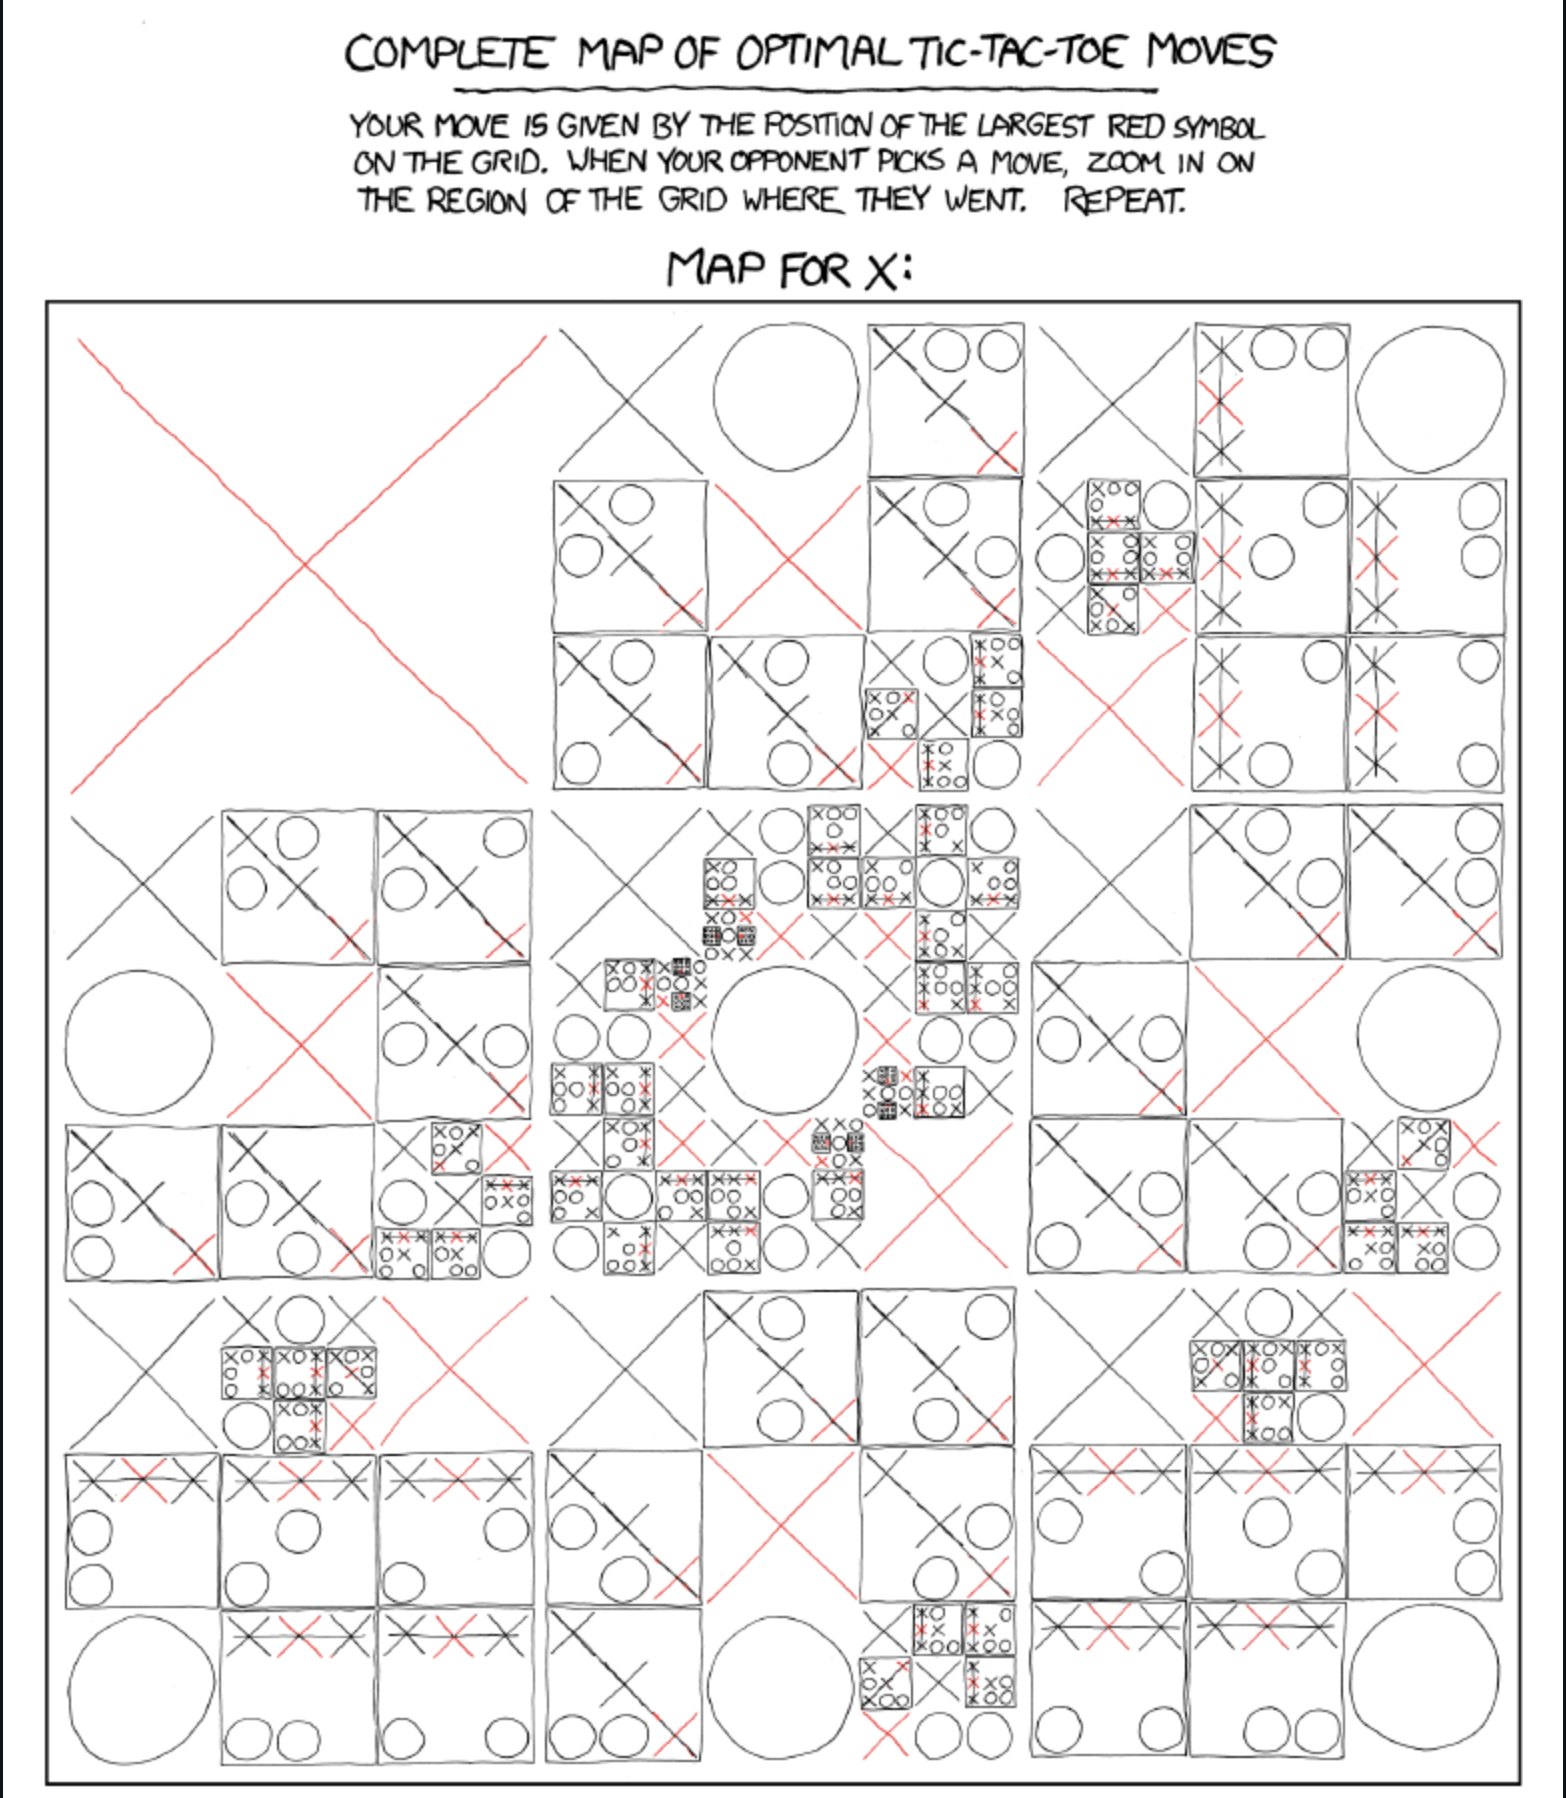

In [ ]:
from IPython.display import Image
Image(filename='/content/TTT_Moves_X.png', width = 500, height = 500)

## 2. Game example: Connect Four

Connect Four is a game in which the players choose a color and then take turns dropping colored tokens into a six-row, seven-column vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own tokens.

Alternatively, you can check the rules [here](https://www.youtube.com/watch?v=ylZBRUJi3UQ&t=5s).

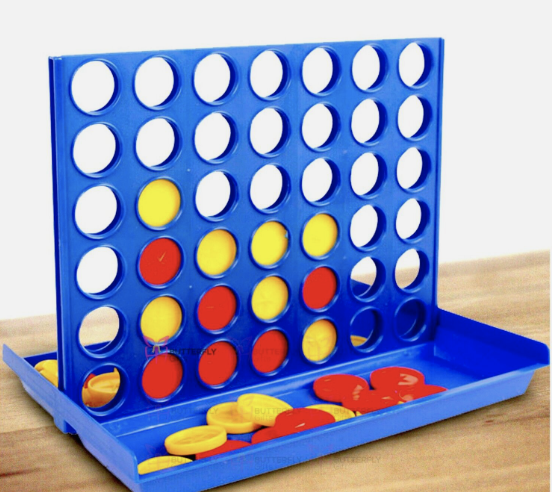

In [ ]:
from IPython.display import Image
Image(filename='/content/Connect_Four.png', width = 240, height = 200)

### 2.1 Game instantiation


Recall that in the source code for the class TicTacToe, we actually defined an **h x v board** and we set the winning target to be **k in a horizontal/vertical/diagonal line**. For Connect Four, we have a **six-row, seven-column board**, and the objective is to get four in a horizontal/vertical/diagonal line.

Due to gravity, one can only put a token on the bottom
row, or in a square directly above an occupied spot.

Can you use these information to implement the Connect Four game?

In [ ]:
# Check out the implementation of TicTacToe first
psource(TicTacToe)

In [10]:
class C4(TicTacToe):
    """A TicTacToe-like game in which you can only make a move on the bottom
    row, or in a square directly above an occupied square. Traditionally
    played on a 6*7 board and requiring 4 in a row."""

    def __init__(self, h=6, v=7, k=4):
        TicTacToe.__init__(self, h, v, k)

    def actions(self, state):
        # If we write (x, y) as the coordinate on the board,
        # then the bottom row correspond to x=7, or equivalently x=self.h
        # Recall that state.board is a dict
        # the keys are occupied locations
        return [(x, y) for (x, y) in state.moves
                if x == self.h or (x + 1 , y) in state.board]

In [11]:
# instantiate an object to represent the Connect Four game
C4game = C4()
print(C4game.initial)

GameState(to_move='X', utility=0, board={}, moves=[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7)])


Note in the above output, moves represent all open positions, not **legal move** positions. We can print out the initial board (7 rows, 6 columns) using the `display()` method:

In [12]:
# checking a particular state of the game
C4game.display(C4game.initial)

. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . . . . . 


### 2.2 From alpha-beta search to alpha-beta cutoff search

Connect Four is undoubtedly a more complicated game than Tic-tac-toe. Despite being able to pruning the game tree, **alpha-beta** still has to search all the way to **terminal states** for at least **a portion of the search space**. Even for this relatively simple game of Connect Four (compared to the chess), this is **NOT practical**, as we cannot allow `alpha_beta_player` to take forever to reach a decision.


In [ ]:
# NOT RUN (taking forever)
# C4game.play_game(random_player, alpha_beta_player)

Claude Shannon (1950) proposed that programs should **cut off the search earlier** and apply a **heuristic evaluation function** to states in the search, effectively turning nonterminal nodes into terminal leaves. The basic idea is to alter *minmax* or *alpha-beta* in two ways:

- replace the `utility` function by a heuristic evaluation function (`EVAL`), which estimates the position's utility, and
- replace the terminal test by a **cutoff test**, that decides when to apply `EVAL`.

We shall discuss evaluation functions later. We need to modify the **Alpha-beta search** algorithm, so that it will call the heuristic `EVAL` function when it is appropriate to cut off the search. It's basically a substitution of two lines of code that mention the `TERMINAL_TEST` with the `CUTOFF_TEST` and `EVAL` functions (see figure below, in red).

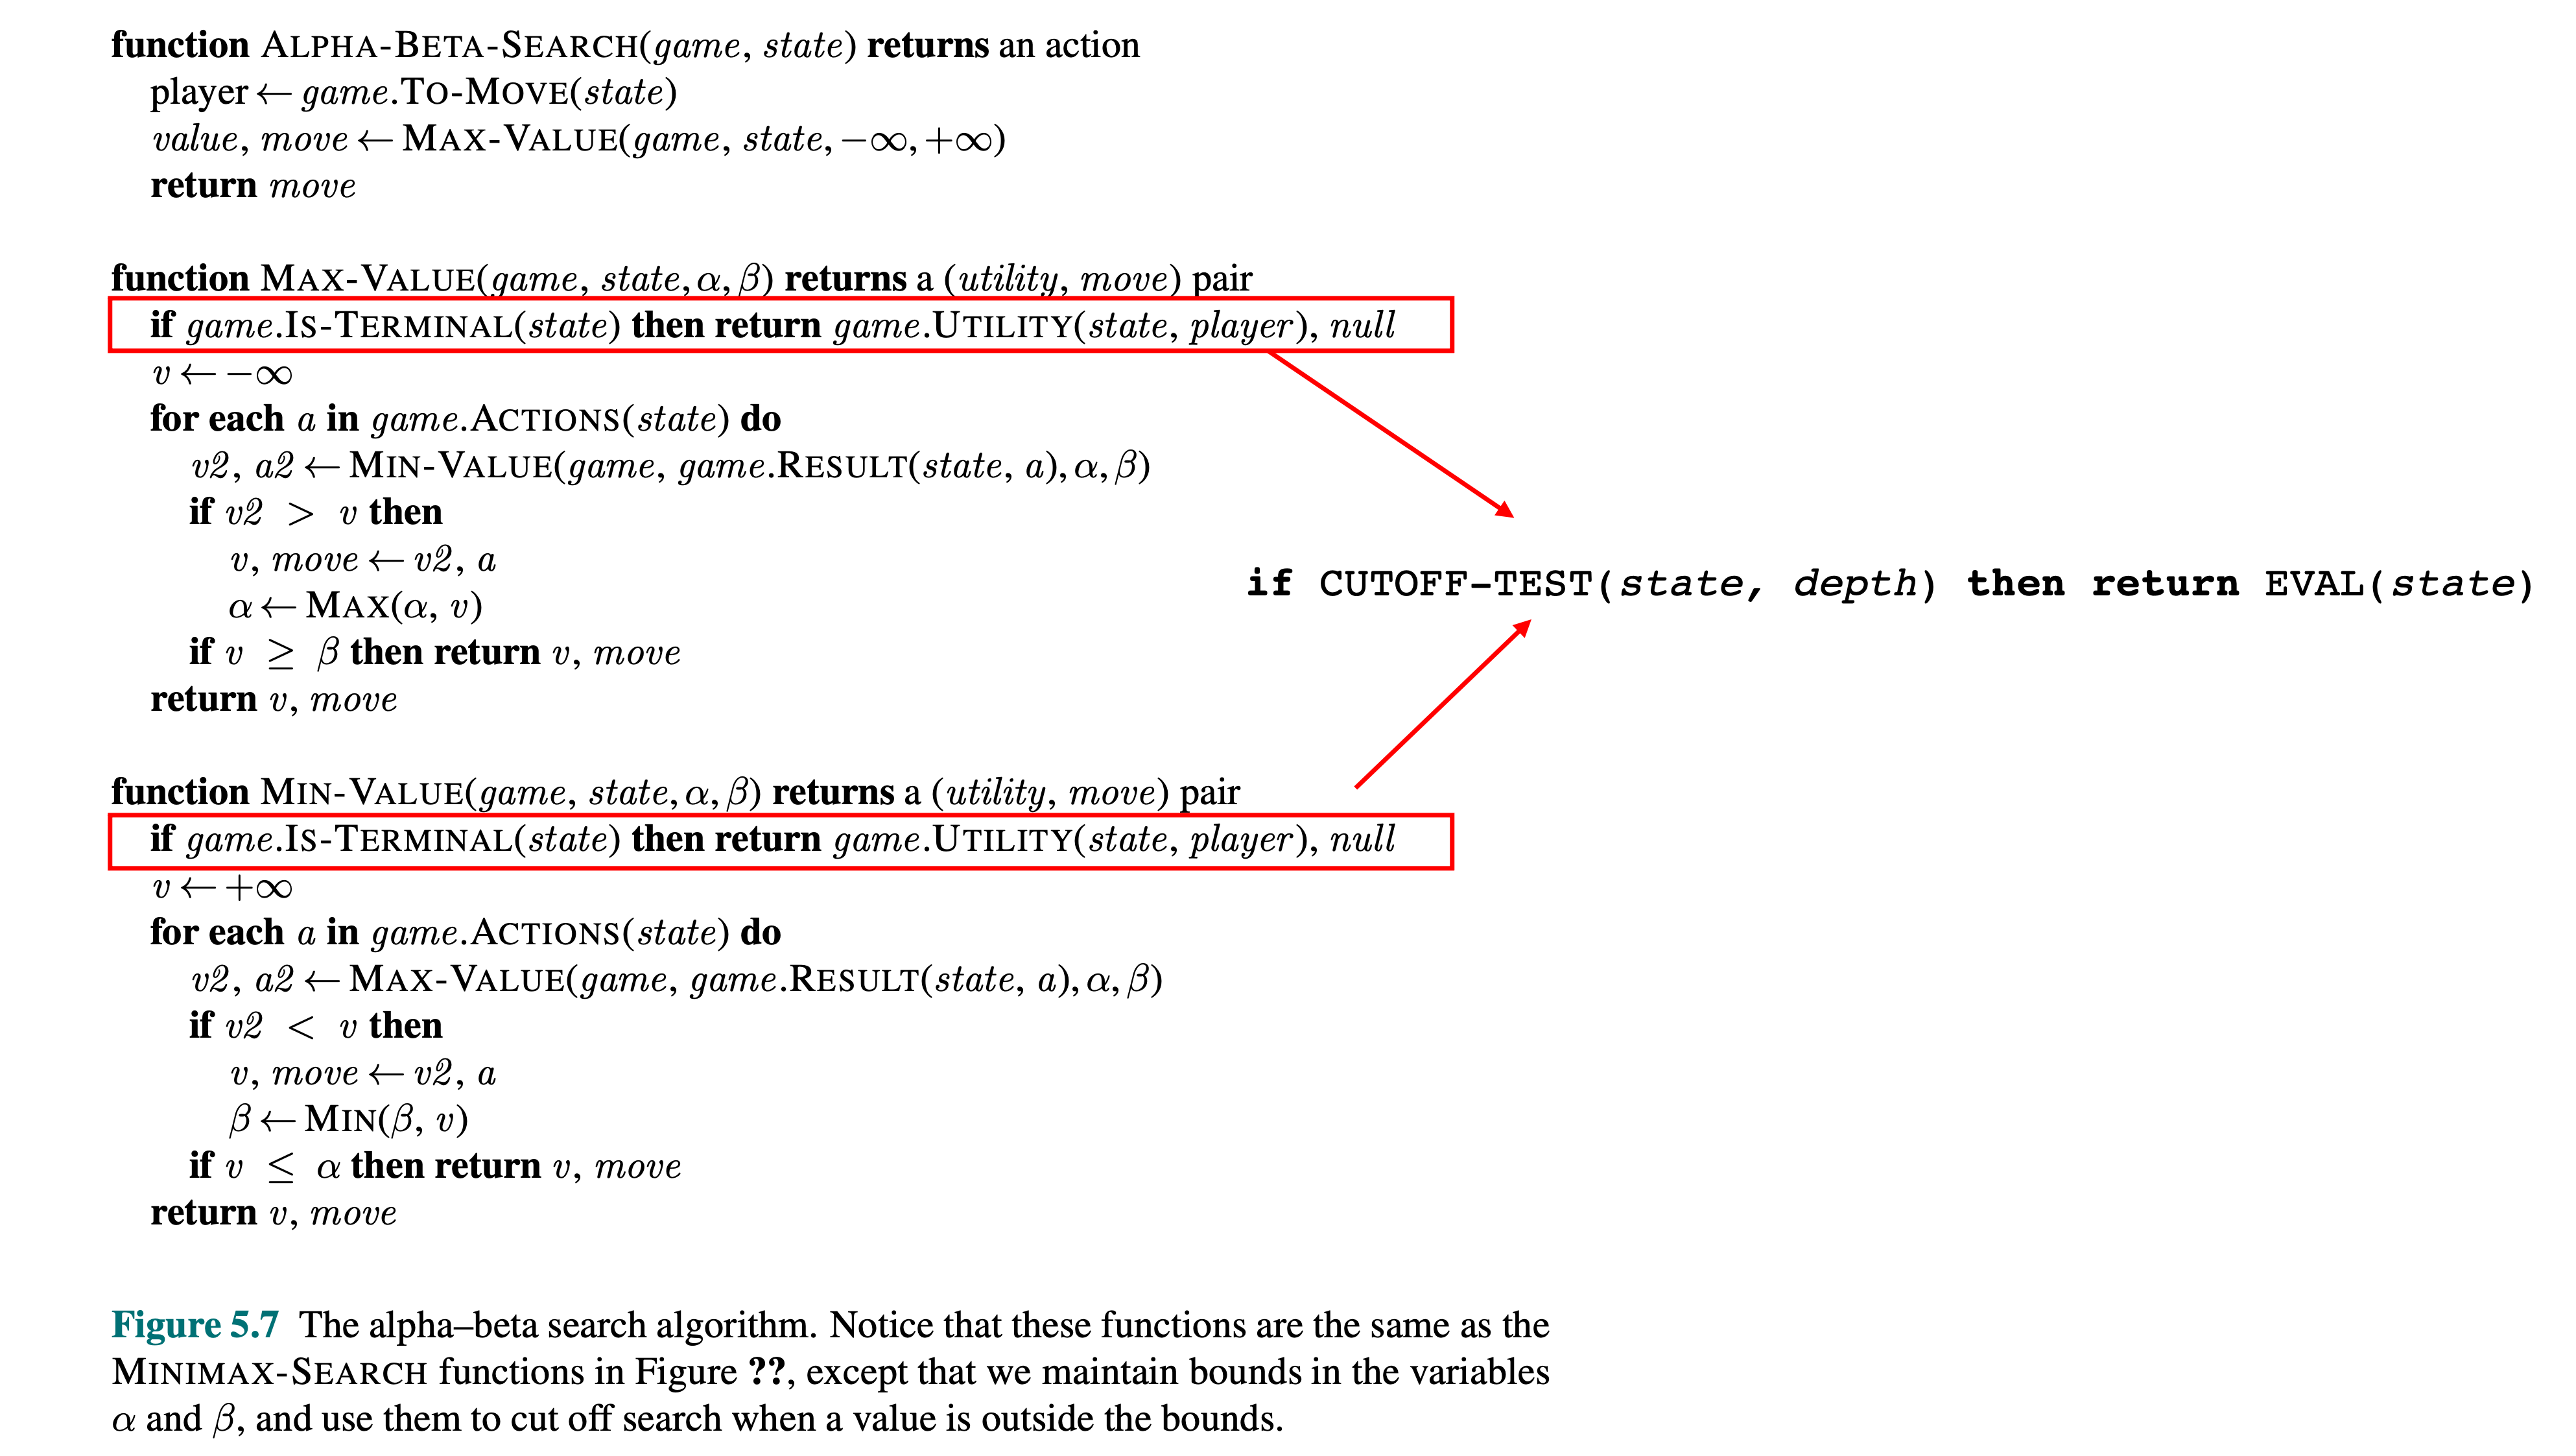

In [ ]:
from IPython.display import Image
Image(filename='/content/AIMA_W04_07.png', width = 1000, height = 600)

The best approach for controlling the amount of search is to set a **fixed depth limit** so that `CUTOFF_TEST(state, depth)` returns *true* for all *depth* greater than some fixed depth *d*. In the implementation, we thus use the `alpha_beta_cutoff_search` algorithm instead of `alpha_beta_search`. We can cut off at depth level d=4, for example.

In [ ]:
# Recall alpha-beta search code
# psource(alpha_beta_search)

In [ ]:
# alpha-beta pruning with cutoff
# psource(alpha_beta_cutoff_search)

In [13]:
# A slight modification of alpha_beta_cutoff_search in games4e.py
def alpha_beta_cutoff_search(state, game, d=4, cutoff_test=None, eval_fn=None):
    """Search game to determine best action; use alpha-beta pruning.
    This version cuts off search and uses an evaluation function."""

    player = game.to_move(state)

    # Functions used by alpha_beta
    def max_value(state, alpha, beta, depth):
        if cutoff_test(state, depth):
            return eval_fn(state, player)
        v = -np.inf
        for a in game.actions(state):
            v = max(v, min_value(game.result(state, a), alpha, beta, depth + 1))
            if v >= beta:
                return v
            alpha = max(alpha, v)
        return v

    def min_value(state, alpha, beta, depth):
        if cutoff_test(state, depth):
            return eval_fn(state, player)
        v = np.inf
        for a in game.actions(state):
            v = min(v, max_value(game.result(state, a), alpha, beta, depth + 1))
            if v <= alpha:
                return v
            beta = min(beta, v)
        return v

    # Body of alpha_beta_cutoff_search starts here:
    # The default test cuts off at depth d or at a terminal state
    cutoff_test = (cutoff_test or (lambda state, depth: depth > d or game.terminal_test(state)))
    eval_fn = eval_fn or (lambda state, player: game.utility(state, player))
    best_score = -np.inf
    beta = np.inf
    best_action = None
    for a in game.actions(state):
        v = min_value(game.result(state, a), best_score, beta, 1)
        if v > best_score:
            best_score = v
            best_action = a
    return best_action

#### Evaluation function

An **evaluation function** returns an *estimate* of the expected utility of the game from a given position. Three principles:

1. The evaluation function should order the terminal states in the same as the true utility function: states that are wins must evaluate better than draws, which in turn must be better than losses.
2. The computation must not take too long.
3. For non-terminal states, the evaluation function should be strongly correlated with the actual chances of winning.

For Connect Four, how can we construct a good evaluation function that satisfies the three principles above?

First, we consider every possible 4-in-a-line segments. Each segment has length 4, and can be horizontal or vertial or diagonal.

In [14]:
def generate_segments(h=6, v=7, k=4):
    """ generate all segments of length k=4 on this board;
        segment is a list of lists of length 4 """

    segments = []

    # generate the vertical segments
    for y in range(1, v + 1):
        for x in range(1, h - k + 2):
            segment = []
            for t in range(k):
                segment.append((x + t, y))
            segments.append(segment)

    # generate the horizontal segments
    for x in range(1, h + 1):
        for y in range(1, v - k + 2):
            segment = []
            for t in range(k):
                segment.append((x, y + t))
            segments.append(segment)

    # generate the bottom left to top right diagonal segments
    for x in range(k, h + 1):
        for y in range(1, v - k + 2):
            segment = []
            for t in range(k):
                segment.append((x - t, y + t))
            segments.append(segment)

    # generate the top left to bottom right diagonal segments
    for y in range(1, v - k + 2):
        for x in range(1, h - k + 2):
            segment = []
            for t in range(k):
                segment.append((x + t, y + t))
            segments.append(segment)

    return segments

In [15]:
all_segments = generate_segments()

Second, for each segment (of length 4), we can count, in the current state of the game, the number of X's and the number of O's in it. If both X and O are present in this segment, then this segment is considered **mixed or neutral**, i.e. no advantage for either side. If there is only X's or only O's in a segment, then depending on the number of pieces in this segment, we attach different values to each scenario:

1.   If one side has 1 piece in the segment, while the other has none, then this is a **small advantage**: 1 point;
2.   If one side has 2 pieces in the segment, while the other has none, then this is a **medium advantage**: 10 points;
3.   If one side has 3 pieces in the segment, while the other has none, then this is a **big advantage**: 100 points;
4.   If one side has 4 pieces in the segment, while the other has none, then this is **game over**: 100,000 points.

Finally, our evaluation function is simply the sum of the evaluation/score of every segment (of length 4).

Question: Can you see how this evaluation function satisfies the 1st and the 3rd principles above?

In [16]:
def count_in_segment(segment, state):
    """  Returns the count of X & O in a segment """

    X_count, O_count = 0, 0
    for x, y in segment:
        if state.board.get((x, y)) == 'X':
            X_count += 1
        elif state.board.get((x, y)) == 'O':
            O_count += 1

    return X_count, O_count

In [18]:
def eval_segment(segment, state, player):
    """ Returns the evlaution score for a segment """

    X_count, O_count = count_in_segment(segment, state)
    if X_count > 0 and O_count > 0:
        return 0   # mixed segments are neutral

    count = max(X_count, O_count)
    score = 0

    if count == 1:  # open segments with 1 in a row (small chance)
        score = 1
    elif count == 2:  # open segments with 2 in a row (medium chance)
        score = 10
    elif count == 3:  # open segments with 3 in a row (big chance)
        score = 100
    elif count == 4:   # open segments with 4 in a row (game over)
        score = 100000

    if X_count > O_count:
        dominant = 'X'
    else:
        dominant = 'O'

    if dominant == player:
        return score
    else:
        return -score

In [19]:
def eval_fn(state, player):
    """ The evaluation function """
    total = 0
    for segment in all_segments:
        total += eval_segment(segment, state, player)
    return total

Now, we can have our `alpha_beta_cutoff_player`, who uses the `alpha_beta_cutoff_search` with this evaluation function and cuts off at depth level d=5!

In [20]:
def alpha_beta_cutoff_player(game, state):
    return alpha_beta_cutoff_search(state, game, d=5, eval_fn = eval_fn)

We also make an `alpha_beta_cutoff_nofn_player`, who uses the `alpha_beta_cutoff_search` but with **NO** evaluation function supplied. By looking at the code inside the function `alpha_beta_cutoff_search(state, game, d=4, cutoff_test=None, eval_fn=None)`, have a think about what happens when no evaluation function is supplied.

In [21]:
def alpha_beta_cutoff_nofn_player(game, state):
    return alpha_beta_cutoff_search(state, game, d=5)

### 2.3 Monte-Carlo tree search (MCTS)

**Monte Carlo tree search (MCTS)** is a heuristic search algorithm for many decision processes, such as being employed in software that plays board games. The focus of MCTS is on the analysis of the most promising moves, expanding the search tree based on random sampling of the search space.

Each round of Monte Carlo tree search consists of four steps:

1. **(Selection)** Starting from the root node *R*, we select good child nodes, that can potentially lead to better overall outcome, until we reach a 'leaf node' *L*, which has not been fully expanded. A widely used selection policy is **UCT** (Upper Confidence bound 1 applied to Trees), which maintains a balance between **exploration and exploitation**.

2. **(Expansion)** Unless *L* ends the game (terminal state), we expand out its child nodes (based on legal moves) and select one **child node** *C* from them.

3. **(Simulation)** Run a simulated **playout/rollout** from *C* until a result is achieved. We can choose random moves in the playout.

4. **(Back-propagation)** Use the result of the playout to **update** information in the nodes on the path from *C* to *R*.

Rounds of search are repeated as long as the time allotted to a move remains; or, as in our implementation, we cap the number of rounds of search at *N*.

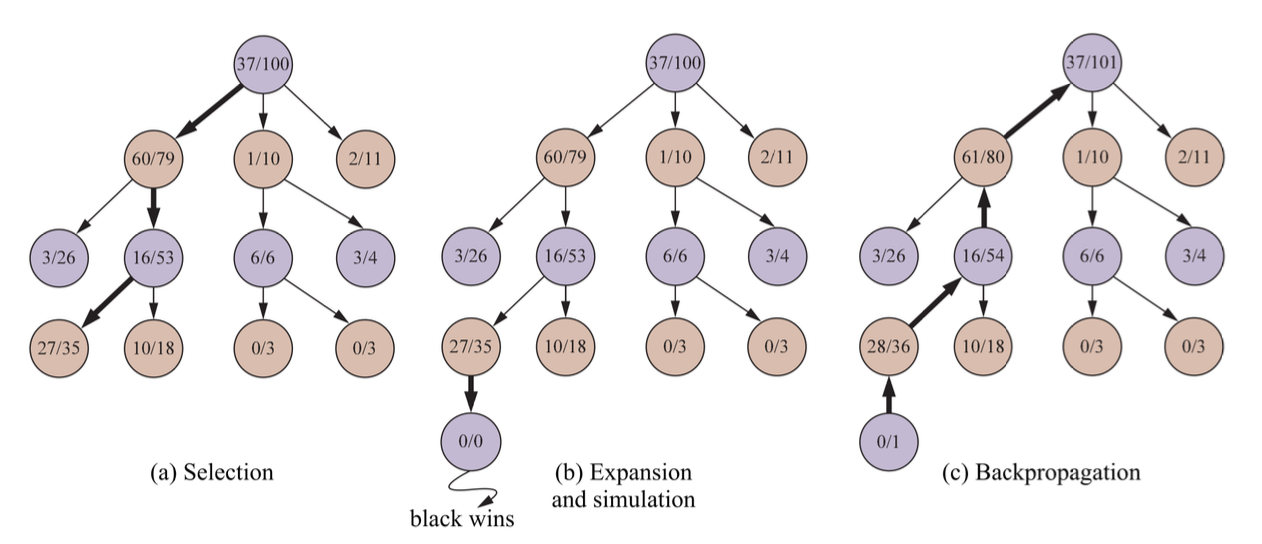

In [ ]:
from IPython.display import Image
Image(filename='/content/MCTS.png', width = 600, height = 250)

You can read the pseudocode and check out the implementation of `monte_carlo_tree_search` below:

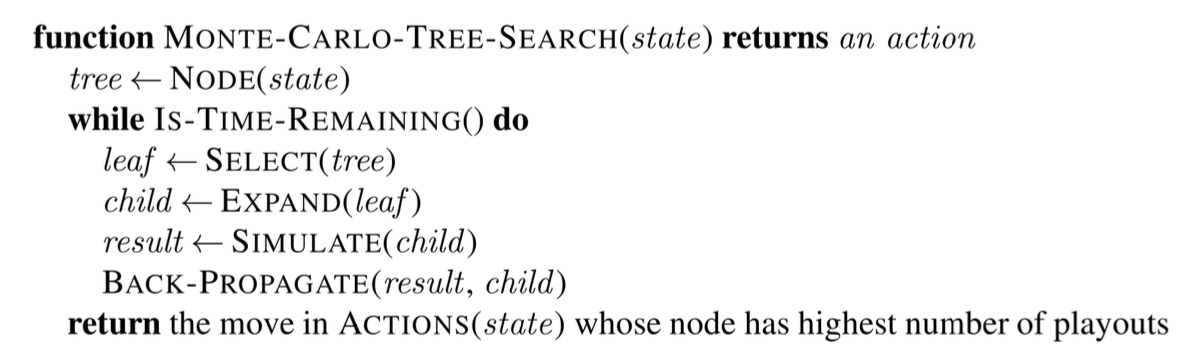

In [ ]:
from IPython.display import Image
Image(filename='/content/MCTS_pcode.png', width = 500, height = 200)

In [ ]:
# check out the implementation of monte_carlo_tree_search
psource(monte_carlo_tree_search)

You should now be able to understand everything in this function: `select(n)`, `expand(n)`, `simulate(game, state)`, `backprop(n, utility)` and the main loop.

We now define a `MCTS_player` with *N=1000*.

In [22]:
def MCTS_player(game, state):
    return monte_carlo_tree_search(state, game, N=1000)

### 2.4 Let's play some Connect Four!

We can now play games between `random_player`, `alpha_beta_cutoff_player`, `alpha_beta_cutoff_nofn_player` and `MCTS_player`. We ask them to play out a round-robin tournament.

**Game ready!**

In [23]:
C4game = C4()

**Players ready!**

In [24]:
all_players = [random_player, alpha_beta_cutoff_player, alpha_beta_cutoff_nofn_player, MCTS_player]
results = {}

**And the tournament begins now!**

In [ ]:
# The round-robin tournament will take a while to complete
for i in range(len(all_players)):
    for j in range(len(all_players)):
        h2h = [0, 0, 0]
        for _ in range(20):
            res = C4game.play_game(all_players[i], all_players[j])
            if res == 1:
                h2h[0] += 1
            elif res == -1:
                h2h[1] += 1
            else:
                h2h[2] += 1
        results[(i, j)] = h2h
        print('1 matchup completed')

**Let's check out the winningest player!**

In [ ]:
results

In [ ]:
import pandas as pd
import numpy as np

player_names = ['random', 'abc_eval', 'abc_no_eval', 'mcts']
df = pd.DataFrame(columns = player_names, index = player_names)
df.columns.name = 'second move'
df.index.name = 'first move'

for i in range(len(player_names)):
    for j in range(len(player_names)):
        df.loc[player_names[i]].at[player_names[j]] = '-'.join(map(str, results.get((i, j))))

df

Here are the tabulated results when I last ran it. Each cell is in the form of #Win-#Lose-#Draw in terms of the first-move player. Note that both `alpha_beta_cutoff_player` and `alpha_beta_cutoff_nofn_player` have **no randomness** in their search procedure. The results between them are thus **deterministic**. Games involving `random_player` or `MCTS_player` can generate **random** outcomes, though `random_player` almost always loses to any other opponent.

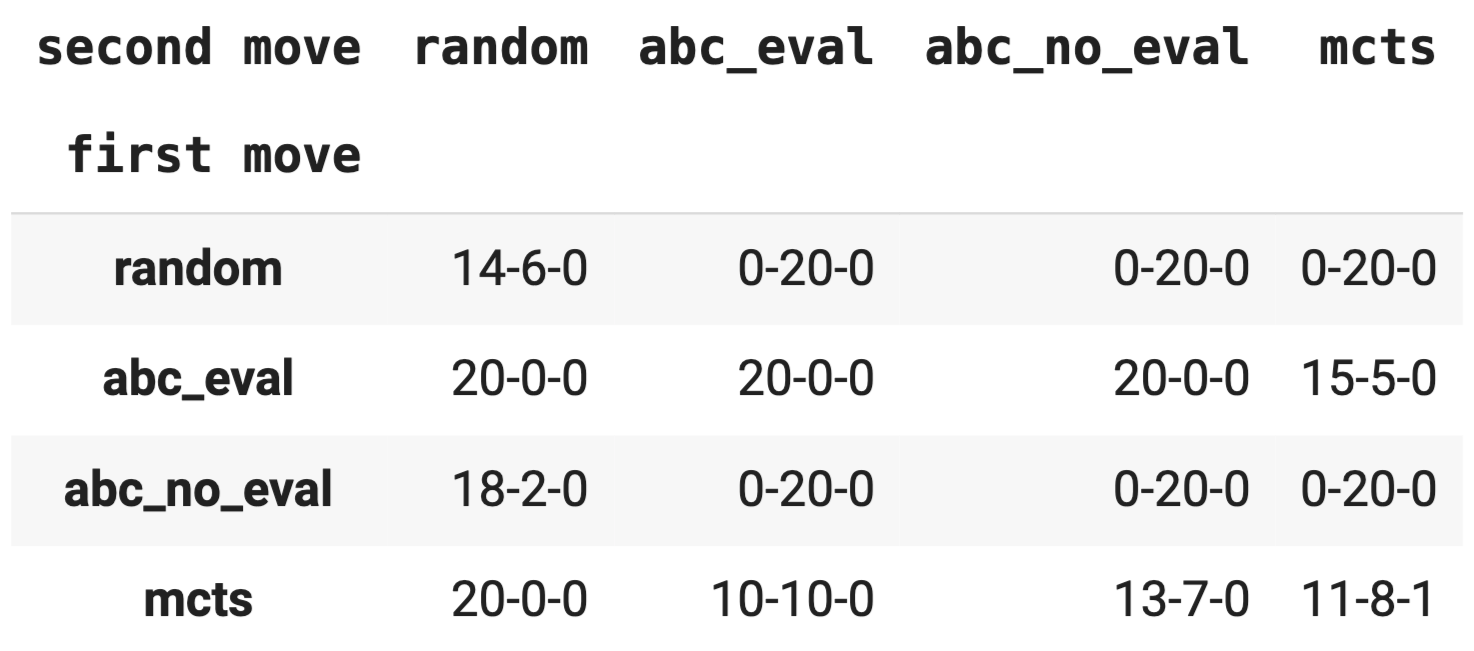

In [ ]:
from IPython.display import Image
Image(filename='/content/Connect_Four_results.png', width = 600, height = 270)